   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
     survived  pclass     sex   age  sibsp  parch   fare embarked   class  \
886         0       2    male  27.0      0      0  13.00        S  Second   
887         1       1  female  19.0      0      0  30.00        S

pclass,Business,Economy,First Class
who,,,
child,19,58,6
man,99,319,119
woman,66,114,91


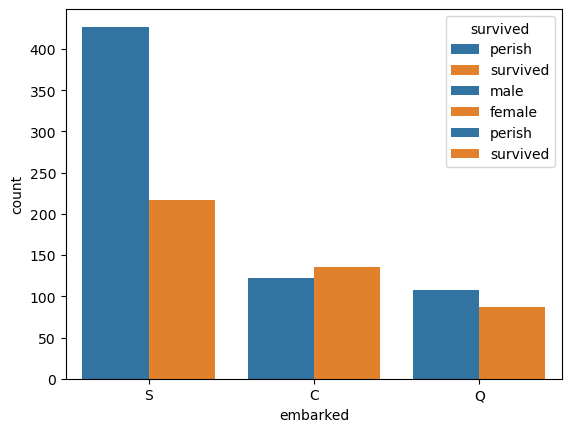

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("titanic")
print(df.head())
print(df.tail())
df.info() # 컬럼별 정보
df.describe() # 컬럼에 대한 요약 통계
df.describe(include='object')


# 전체 데이터 중 나이가 15세 미만인 승객
print( df[ df.age < 15 ] )

#s 남자이면서 1등석 승객
print( df[ ( df['sex'].isin(['male'] ) ) & ( df['class'].isin( ['First'] )  )] ) 
print( df[ ( df['sex'].isin(['male'] ) ) & ( df['class'].isin( ['First'] )  )]['who']  ) # 조건에 맞는'who'만 출

#fare를 30이상 40미만 지불한 승객
print( df[  (df.fare >=30) & (df.fare <40) ]['fare'] )

#나이의 평균과 중앙값
print( df.age.mean(), df.age.median() )

# 결측값 확인
print(df.isnull().sum())

# 피벗 테이블
res = pd.pivot_table( df, 
                     index =['class', 'sex'], 
                     columns='survived', values=['age', 'fare'], 
                     aggfunc = ['mean', 'max'] )
print( res )

#성별 생존자 수 확인
print( df.groupby('sex').sum()['survived'] )
print('='*100)
res2 = pd.pivot_table( df, 
                     index =['sex'], columns='survived',  aggfunc = 'size' )
print( res2 )

#좌석등급별 생존자 수 확인(그래프)
df.survived = df.survived.replace( 1, 'survived')
df.survived = df.survived.replace( 0, 'perish')
df.pclass = df.pclass.replace(1,'First Class')
df.pclass = df.pclass.replace(2,'Business')
df.pclass = df.pclass.replace(3,'Economy')
sns.countplot( data=df, x='pclass', hue='survived')

#성별 생존자 수 확인(그래프)
print(df['who'].value_counts())
sns.countplot( x='pclass', hue='sex', data=df )

#탑승지별 생존자수/사망자수 확인(그래프)
sns.countplot( data=df, x='embarked', hue='survived')

#크로스탭
print( df['survived'].value_counts())
pd.crosstab(df['who'], df['pclass'])


KeyError: 'fare'